In [ ]:
# HEALTHCARE DATA ANALYSIS

In [ ]:
# Import the Library

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load The Dataset

In [8]:
df=pd.read_csv("healthcare_dataset.csv")
print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [ ]:
# Missing Value

In [9]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [12]:
df.shape

(55500, 15)

In [ ]:
# Descriptive Statistics

In [13]:
print(df.describe())

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


In [ ]:
# Age Distribution Anaysis

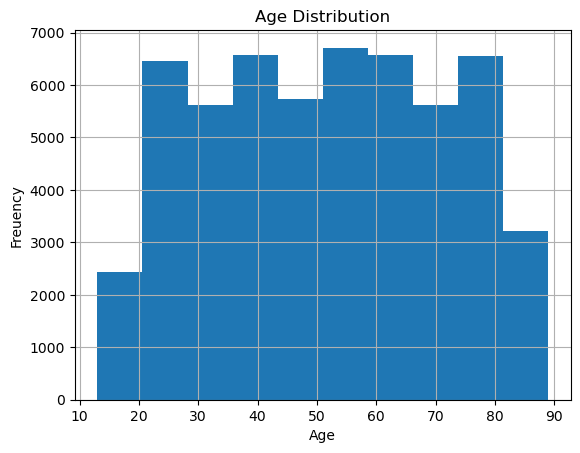

In [15]:
plt.figure()
df["Age"].hist()
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Freuency")
plt.show()

In [ ]:
# Billing Amount Distribution

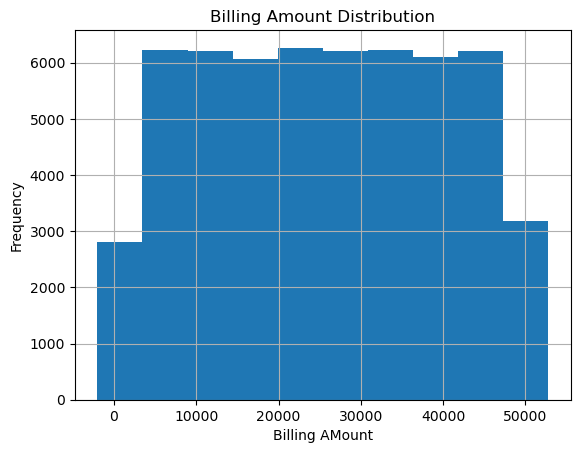

In [16]:
plt.figure()
df["Billing Amount"].hist()
plt.title("Billing Amount Distribution")
plt.xlabel("Billing AMount")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Disease Incidence by Gender

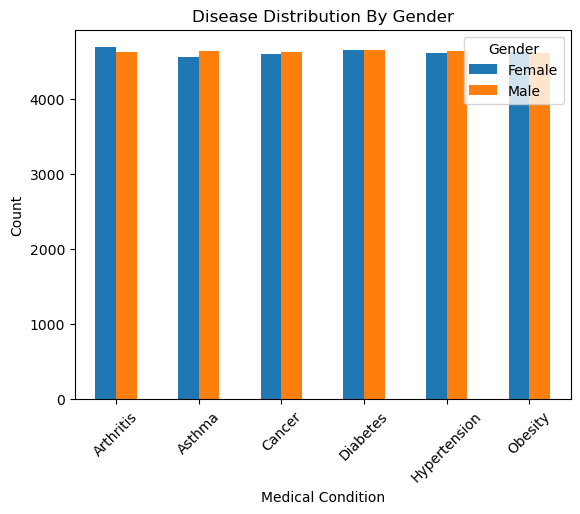

In [17]:
disease_gender=pd.crosstab(df["Medical Condition"],df["Gender"])
disease_gender.plot(kind="bar")
plt.title("Disease Distribution By Gender")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Healthcare Cost by Medical Condition

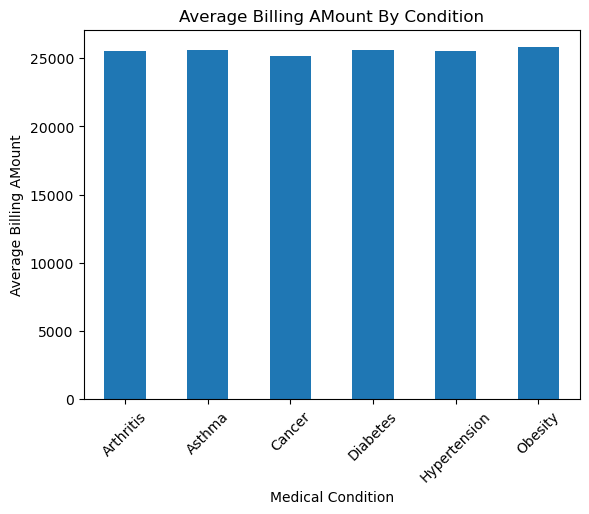

In [19]:
avg_cost_condition=df.groupby("Medical Condition")["Billing Amount"].mean()
avg_cost_condition.plot(kind="bar")
plt.title("Average Billing AMount By Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Average Billing AMount")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Yearly Admission Trends

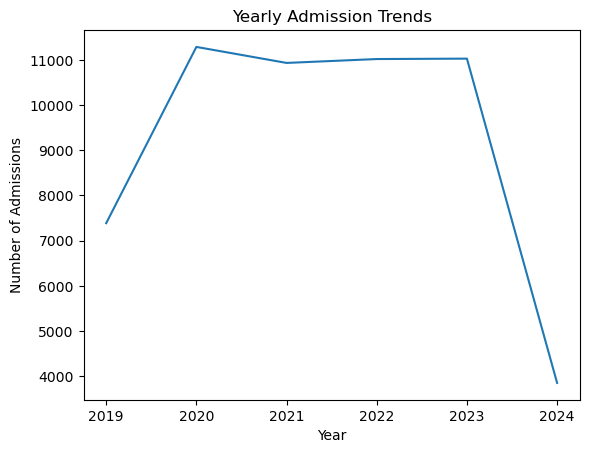

In [21]:
df["Date of Admission"]=pd.to_datetime(df["Date of Admission"])
df["Year"]=df["Date of Admission"].dt.year

yearly_admission=df["Year"].value_counts().sort_index()

plt.figure()
yearly_admission.plot()
plt.title("Yearly Admission Trends")
plt.xlabel("Year")
plt.ylabel("Number of Admissions")
plt.show()

In [ ]:
# Create Age Groups

In [23]:
df["Age Group"]=pd.cut(
    df["Age"],
    bins=[0,18,35,50,65,100],
    labels=["0-18","19-25","36-50","51-65","65+"]
)

print(df["Age Group"].value_counts())

Age Group
65+      16250
19-25    13644
51-65    12417
36-50    12301
0-18       888
Name: count, dtype: int64


In [ ]:
# Stacked Bar Chart

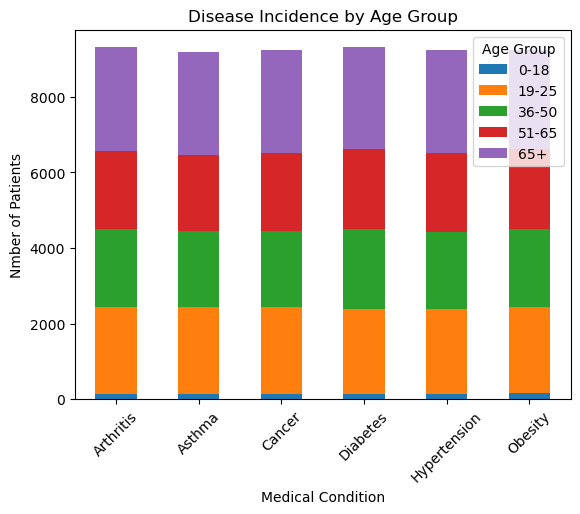

In [25]:
disease_age=pd.crosstab(df["Medical Condition"],df["Age Group"])

disease_age.plot(kind="bar",stacked=True)

plt.title("Disease Incidence by Age Group")
plt.xlabel("Medical Condition")
plt.ylabel("Nmber of Patients")
plt.xticks(rotation=45)
plt.show()

In [26]:
import seaborn as sns

In [ ]:
# Disease by Gender

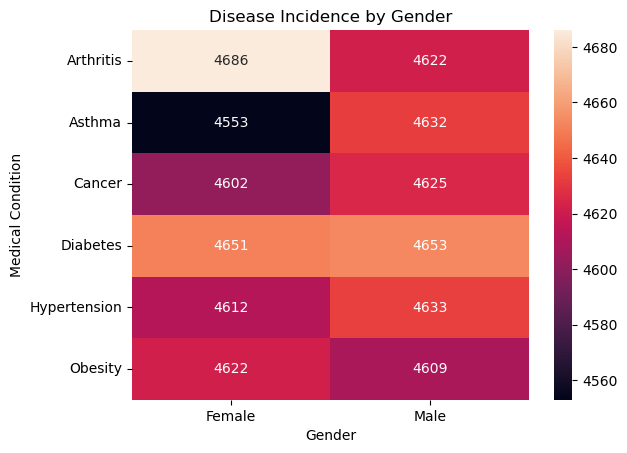

In [27]:
disease_gender = pd.crosstab(df["Medical Condition"],df["Gender"])

plt.figure()
sns.heatmap(disease_gender,annot=True,fmt="d")
plt.title("Disease Incidence by Gender")
plt.xlabel("Gender")
plt.ylabel("Medical Condition")
plt.show()

In [ ]:
# Combined Analysis

In [29]:
age_gender_condition=pd.crosstab(
    [df["Age Group"],df["Gender"]],df["Medical Condition"]
)
print(age_gender_condition)

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Age Group Gender                                                             
0-18      Female          84      77      69        73            77       75
          Male            66      73      77        67            66       84
19-25     Female        1165    1138    1162      1137          1098     1144
          Male          1114    1151    1126      1109          1154     1146
36-50     Female        1039     988    1010      1039          1015     1026
          Male          1045    1021    1001      1076          1020     1021
51-65     Female        1032     981    1038      1023           991     1063
          Male          1015    1017    1034      1084          1080     1059
65+       Female        1366    1369    1323      1379          1431     1314
          Male          1382    1370    1387      1317          1313     1299


In [30]:
# Create Age Groups

df["Age Group"]=pd.cut(
    df["Age"],
    bins=[0,18,35,50,65,100],
    labels=["0-18","19-35","36-50","51-65","65+"]
)

# Filter Older Adults(65+)
older_patients=df[df["Age Group"]=="65+"]

# Count Conditions
older_condition_counts=older_patients["Medical Condition"].value_counts()
print(older_condition_counts.head(10))

Medical Condition
Arthritis       2748
Hypertension    2744
Asthma          2739
Cancer          2710
Diabetes        2696
Obesity         2613
Name: count, dtype: int64


In [31]:
gender_condition=pd.crosstab(df["Medical Condition"],df["Gender"])
print(gender_condition)

Gender             Female  Male
Medical Condition              
Arthritis            4686  4622
Asthma               4553  4632
Cancer               4602  4625
Diabetes             4651  4653
Hypertension         4612  4633
Obesity              4622  4609


In [33]:
gender_percent=gender_condition.div(gender_condition.sum(axis=1),axis=0)*100
print(gender_percent)

Gender                Female       Male
Medical Condition                      
Arthritis          50.343790  49.656210
Asthma             49.569951  50.430049
Cancer             49.875366  50.124634
Diabetes           49.989252  50.010748
Hypertension       49.886425  50.113575
Obesity            50.070415  49.929585


In [34]:
cost_by_condition=df.groupby("Medical Condition")["Billing Amount"].agg(
    ["mean","median","sum"]
)
print(cost_by_condition)

                           mean        median           sum
Medical Condition                                          
Arthritis          25497.327056  25581.763549  2.373291e+08
Asthma             25635.249359  25661.872824  2.354598e+08
Cancer             25161.792707  24910.980640  2.321679e+08
Diabetes           25638.405577  25621.077269  2.385397e+08
Hypertension       25497.095761  25275.670593  2.357207e+08
Obesity            25805.971259  26129.997134  2.382149e+08


In [35]:
cost_by_hospital=df.groupby("Hospital")["Billing Amount"].agg(
    ["mean","median","sum"]
)
print(cost_by_hospital)

                                       mean        median           sum
Hospital                                                               
Abbott Inc                     38052.041917  38052.041917  38052.041917
Abbott Ltd                     29877.586483  29877.586483  29877.586483
Abbott Moore and Williams,     24799.596339  24799.596339  24799.596339
Abbott and Thompson, Sullivan  16738.569765  16738.569765  16738.569765
Abbott, Peters and Hoffman     18842.396863  18842.396863  37684.793727
...                                     ...           ...           ...
and Zimmerman Sons             32706.652625  32706.652625  32706.652625
and Zuniga Davis Carlson,      42867.041298  42867.041298  42867.041298
and Zuniga Francis Peterson,   33689.630726  33689.630726  33689.630726
and Zuniga Sons                33950.170483  33950.170483  33950.170483
and Zuniga Thompson, Blake     22067.428763  22067.428763  22067.428763

[39876 rows x 3 columns]


In [ ]:
# Grouped Bar Plot

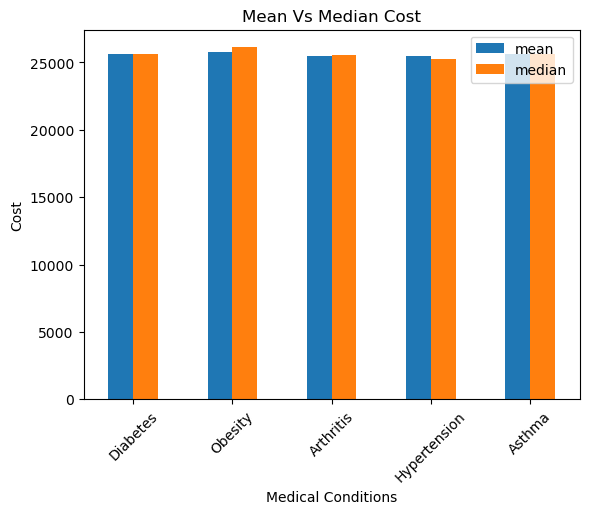

In [36]:
top_conditions=cost_by_condition.sort_values("sum",ascending=False).head(5)

top_conditions[["mean","median"]].plot(kind="bar")

plt.title("Mean Vs Median Cost")
plt.xlabel("Medical Conditions")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Convert Date

In [38]:
df["Date of Admission"]=pd.to_datetime(df["Date of Admission"])
df["Year-Month"]=df["Date of Admission"].dt.to_period("M")

In [ ]:
# Monthly Admissions Trends

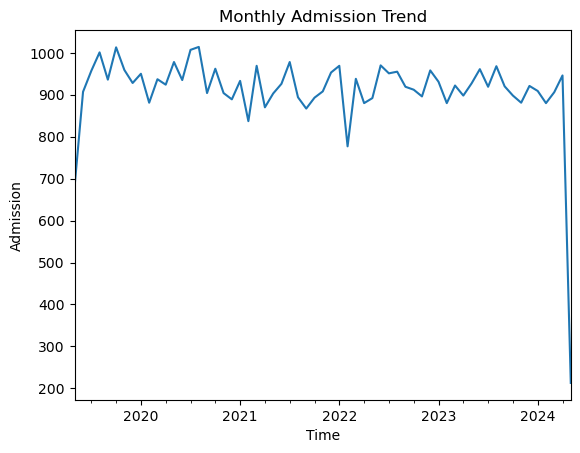

In [39]:
monthly_admissions=df.groupby("Year-Month").size()

plt.figure()
monthly_admissions.plot()
plt.title("Monthly Admission Trend")
plt.xlabel("Time")
plt.ylabel("Admission")
plt.show()

In [ ]:
# Monthly Cost Trend

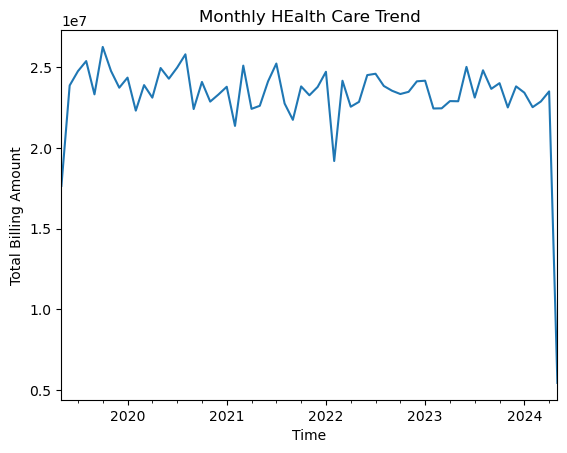

In [40]:
monthly_cost=df.groupby("Year-Month")["Billing Amount"].sum()
plt.figure()
monthly_cost.plot()
plt.title("Monthly HEalth Care Trend")
plt.xlabel("Time")
plt.ylabel("Total Billing Amount")
plt.show()